In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Загрузка данных
# Классификация
def upload_classification_data():
    from google.colab import files
    uploaded = files.upload()
    klass_df = pd.read_csv(list(uploaded.keys())[0])
    return klass_df

# Регрессия
def upload_regression_data():
    from google.colab import files
    uploaded = files.upload()
    reg_df = pd.read_csv(list(uploaded.keys())[0])
    return reg_df

# Загрузка данных
print("Загрузите файл для задачи классификации")
klass_df = upload_classification_data()
print("Загрузите файл для задачи регрессии")
reg_df = upload_regression_data()

# Вывод первых строк данных
print("\nКлассификационные данные:")
print(klass_df.head())
print("\nРегрессионные данные:")
print(reg_df.head())

# Обработка категориальных данных для классификации
categorical_columns_klass = klass_df.select_dtypes(include=['object']).columns
if len(categorical_columns_klass) > 0:
    for col in categorical_columns_klass:
        klass_df[col] = LabelEncoder().fit_transform(klass_df[col])

# Обработка категориальных данных для регрессии
categorical_columns_reg = reg_df.select_dtypes(include=['object']).columns
if len(categorical_columns_reg) > 0:
    for col in categorical_columns_reg:
        reg_df[col] = LabelEncoder().fit_transform(reg_df[col])


Загрузите файл для задачи классификации


Saving klass.csv to klass.csv
Загрузите файл для задачи регрессии


Saving reg.csv to reg.csv

Классификационные данные:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity

In [2]:
# Выбор метрик качества
# Для классификации - точность (accuracy)
# Для регрессии - среднеквадратичная ошибка (MSE)

# Разделение данных на тренировочные и тестовые наборы
X_klass = klass_df.iloc[:, :-1]
y_klass = klass_df.iloc[:, -1]
X_train_klass, X_test_klass, y_train_klass, y_test_klass = train_test_split(X_klass, y_klass, test_size=0.2, random_state=42)

X_reg = reg_df.iloc[:, :-1]
y_reg = reg_df.iloc[:, -1]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_klass = scaler.fit_transform(X_train_klass)
X_test_klass = scaler.transform(X_test_klass)

X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


In [3]:
# Обучение базовых моделей
# Логистическая регрессия для классификации
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train_klass, y_train_klass)
y_pred_klass = logistic_classifier.predict(X_test_klass)
klass_accuracy = accuracy_score(y_test_klass, y_pred_klass)

# Линейная регрессия для регрессии
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = linear_regressor.predict(X_test_reg)
reg_mse = mean_squared_error(y_test_reg, y_pred_reg)

# Вывод результатов бейзлайна
print(f"Точность классификации (логистическая регрессия): {klass_accuracy:.4f}")
print(f"Среднеквадратичная ошибка регрессии (линейная регрессия): {reg_mse:.4f}")


Точность классификации (логистическая регрессия): 0.9231
Среднеквадратичная ошибка регрессии (линейная регрессия): 314.2624


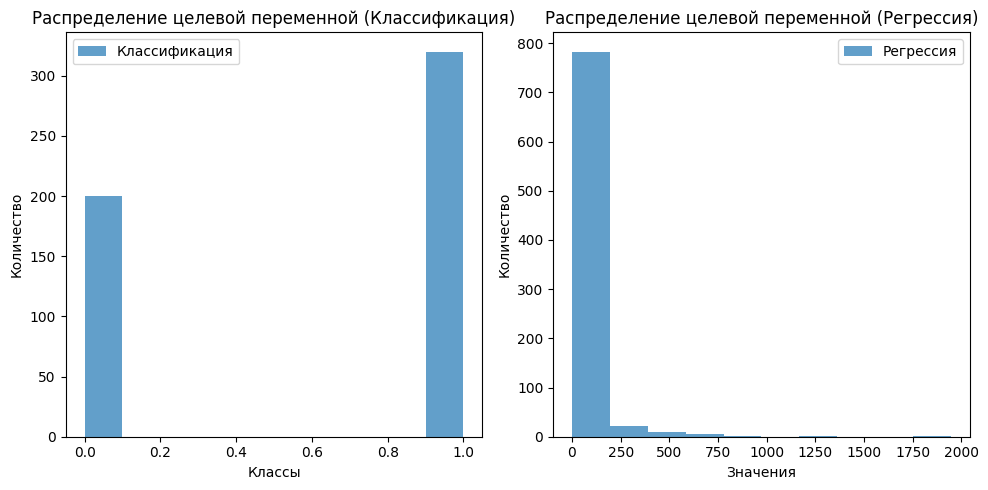

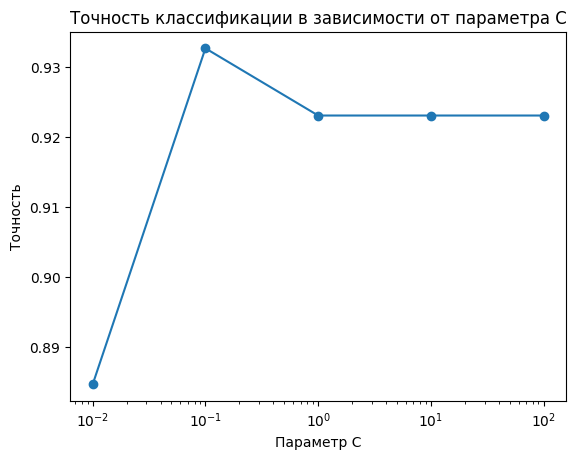

In [4]:
# Улучшение бейзлайна
# Визуализация распределения целевых переменных
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_klass, bins=10, alpha=0.7, label='Классификация')
plt.title('Распределение целевой переменной (Классификация)')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_reg, bins=10, alpha=0.7, label='Регрессия')
plt.title('Распределение целевой переменной (Регрессия)')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend()

plt.tight_layout()
plt.show()

# Подбор гиперпараметров для логистической регрессии
C_values = [0.01, 0.1, 1, 10, 100]
accuracy_scores = []

for c in C_values:
    logistic_classifier = LogisticRegression(C=c, random_state=42)
    logistic_classifier.fit(X_train_klass, y_train_klass)
    y_pred = logistic_classifier.predict(X_test_klass)
    accuracy_scores.append(accuracy_score(y_test_klass, y_pred))

# Визуализация точности для классификации
plt.figure()
plt.plot(C_values, accuracy_scores, marker='o')
plt.title('Точность классификации в зависимости от параметра C')
plt.xlabel('Параметр C')
plt.ylabel('Точность')
plt.xscale('log')
plt.show()

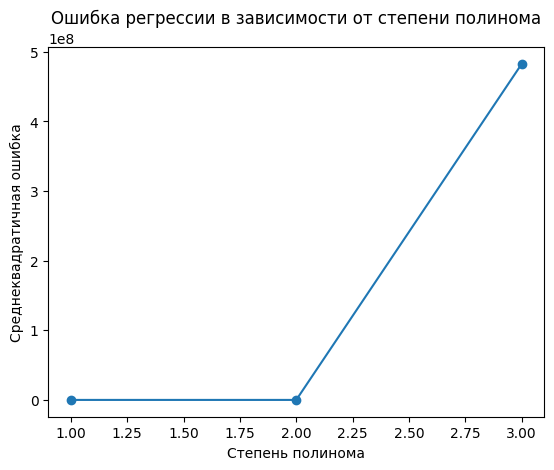

In [5]:
#Подбор гиперпараметров для линейной регрессии через преобразование данных
# В данном случае можно попробовать полиномиальные признаки
from sklearn.preprocessing import PolynomialFeatures

poly_degrees = [1, 2, 3]
mse_scores = []

for degree in poly_degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_reg)
    X_test_poly = poly.transform(X_test_reg)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train_poly, y_train_reg)
    y_pred = linear_regressor.predict(X_test_poly)
    mse_scores.append(mean_squared_error(y_test_reg, y_pred))

# Визуализация ошибки для регрессии
plt.figure()
plt.plot(poly_degrees, mse_scores, marker='o')
plt.title('Ошибка регрессии в зависимости от степени полинома')
plt.xlabel('Степень полинома')
plt.ylabel('Среднеквадратичная ошибка')
plt.show()


In [6]:
# Улучшенные модели
# Логистическая регрессия с оптимальным C
if 'C_values' not in globals():
    C_values = [0.01, 0.1, 1, 10, 100]
best_C = C_values[np.argmax(accuracy_scores)]
logistic_classifier = LogisticRegression(C=best_C, random_state=42)
logistic_classifier.fit(X_train_klass, y_train_klass)
y_pred_klass = logistic_classifier.predict(X_test_klass)
klass_accuracy = accuracy_score(y_test_klass, y_pred_klass)

# Линейная регрессия с полиномиальными признаками
best_degree = poly_degrees[np.argmin(mse_scores)]
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train_reg)
X_test_poly = poly.transform(X_test_reg)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_poly, y_train_reg)
y_pred_reg = linear_regressor.predict(X_test_poly)
reg_mse = mean_squared_error(y_test_reg, y_pred_reg)

# Вывод результатов улучшенных моделей
print(f"Улучшенная точность классификации (логистическая регрессия): {klass_accuracy:.4f}")
print(f"Улучшенная среднеквадратичная ошибка регрессии (линейная регрессия): {reg_mse:.4f}")


Улучшенная точность классификации (логистическая регрессия): 0.9327
Улучшенная среднеквадратичная ошибка регрессии (линейная регрессия): 314.2624
